In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Datei einlesen
file_path = './data/IV_data_50um.csv'
df = pd.read_csv(file_path)

In [39]:
# Extract Voltage, Current and Time
voltage = df['voltage (V)']
current = df['current (A)']
time = df['time (s)']

# Divide Voltage into cycles
voltage_cycle_I = voltage[:196]
voltage_cycle_II = voltage[195:417]
voltage_cycle_III = voltage[416:662]
voltage_cycle_IV = voltage[661:933]
voltage_cycle_V = voltage[932:1228]
voltage_cycle_VI = voltage[1227:1324]
voltage_cycle_VII = voltage[1323:1619]
voltage_cycle_VIII = voltage[1618:1715]
voltage_cycle_IX = voltage[1714:2010]
voltage_cycle_X = voltage[2009:2106]
voltage_cycle_XI = voltage[2105:2401]
voltage_cycle_XII = voltage[2400:]

# Divide Time into cycles
time_cycle_I = time[:196]
time_cycle_II = time[195:417]
time_cycle_III = time[416:662]
time_cycle_IV = time[661:933]
time_cycle_V = time[932:1228]
time_cycle_VI = time[1227:1324]
time_cycle_VII = time[1323:1619]
time_cycle_VIII = time[1618:1715]
time_cycle_IX = time[1714:2010]
time_cycle_X = time[2009:2106]
time_cycle_XI = time[2105:2401]
time_cycle_XII = time[2400:]

# Divide Current into cycles
current_cycle_I = current[:196]
current_cycle_II = current[195:417]
current_cycle_III = current[416:662]
current_cycle_IV = current[661:933]
current_cycle_V = current[932:1228]
current_cycle_VI = current[1227:1324]
current_cycle_VII = current[1323:1619]
current_cycle_VIII = current[1618:1715]
current_cycle_IX = current[1714:2010]
current_cycle_X = current[2009:2106]
current_cycle_XI = current[2105:2401]
current_cycle_XII = current[2400:]

# Compute all needed values
resistance_cycle_I = voltage_cycle_I / current_cycle_I 
resistance_cycle_II = voltage_cycle_II / current_cycle_II 
resistance_cycle_III = voltage_cycle_III / current_cycle_III
resistance_cycle_IV = voltage_cycle_IV / current_cycle_IV 
resistance_cycle_V = voltage_cycle_V / current_cycle_V 
resistance_cycle_VI = voltage_cycle_VI / current_cycle_VI 
resistance_cycle_VII = voltage_cycle_VII / current_cycle_VII 
resistance_cycle_VIII = voltage_cycle_VIII / current_cycle_VIII 
resistance_cycle_IX = voltage_cycle_IX / current_cycle_IX 
resistance_cycle_X = voltage_cycle_X / current_cycle_X 
resistance_cycle_XI = voltage_cycle_XI / current_cycle_XI 
resistance_cycle_XII = voltage_cycle_XII / current_cycle_XII 

resistance = voltage / current

log_abs_voltage = np.log(abs(df['voltage (V)']))

sqrt_voltage = np.sign(voltage) * np.sqrt(abs(voltage))
power_exponent = np.gradient(np.log(abs(current))) / np.gradient(np.log(abs(voltage)))
# power_exponent = np.gradient(np.log(abs(current)), np.log(abs(voltage)))

C:\Users\Phuoc Khang\AppData\Local\Temp\ipykernel_10884\1367560415.py:67: RuntimeWarning: divide by zero encountered in divide
  power_exponent = np.gradient(np.log(abs(current))) / np.gradient(np.log(abs(voltage)))


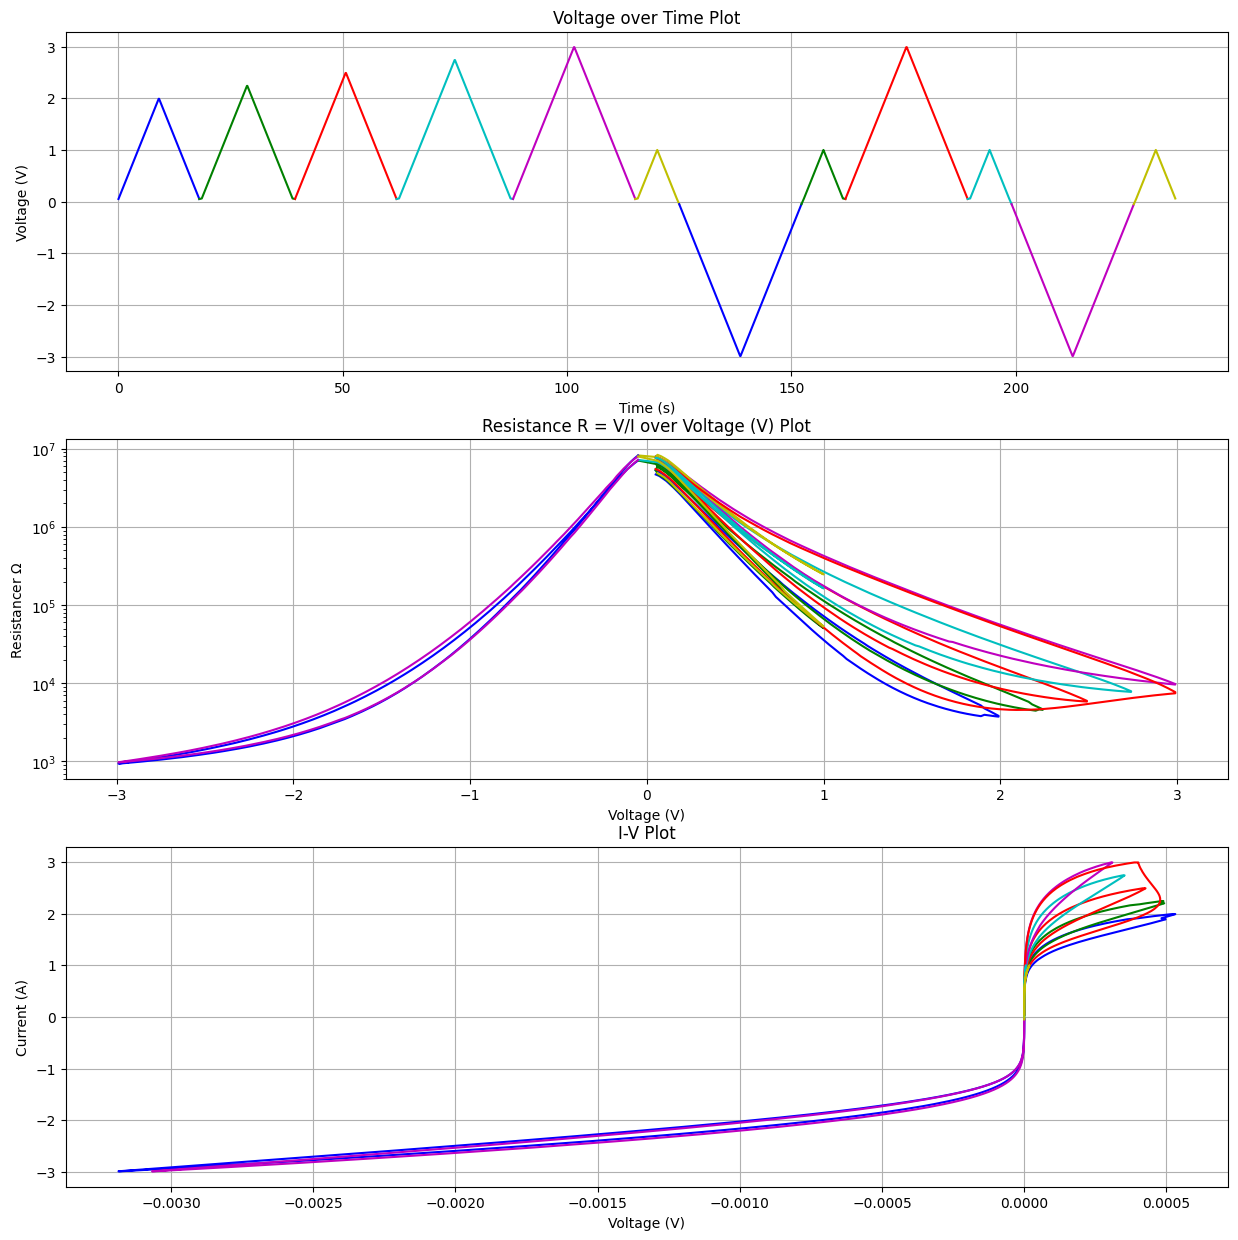

In [37]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
# Voltage over Time
axs[0].plot(time_cycle_I, voltage_cycle_I, 'b', time_cycle_II, voltage_cycle_II, 'g', time_cycle_III, voltage_cycle_III, 'r', time_cycle_IV, voltage_cycle_IV, 'c', 
            time_cycle_V, voltage_cycle_V, 'm', time_cycle_VI, voltage_cycle_VI, 'y', time_cycle_VII, voltage_cycle_VII, 'b', time_cycle_VIII, voltage_cycle_VIII, 'g', 
            time_cycle_IX, voltage_cycle_IX, 'r', time_cycle_X, voltage_cycle_X, 'c', time_cycle_XI, voltage_cycle_XI, 'm', time_cycle_XII, voltage_cycle_XII, 'y')
axs[0].set_title('Voltage over Time Plot')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Voltage (V)')
axs[0].grid()

# Resistance over Voltage
axs[1].plot(voltage_cycle_I, resistance_cycle_I, 'b', voltage_cycle_II, resistance_cycle_II, 'g', voltage_cycle_III, resistance_cycle_III, 'r', voltage_cycle_IV, resistance_cycle_IV, 'c', 
            voltage_cycle_V, resistance_cycle_V, 'm', voltage_cycle_VI, resistance_cycle_VI, 'y', voltage_cycle_VII, resistance_cycle_VII, 'b', voltage_cycle_VIII, resistance_cycle_VIII, 'g', 
            voltage_cycle_IX, resistance_cycle_IX, 'r', voltage_cycle_X, resistance_cycle_X, 'c', voltage_cycle_XI, resistance_cycle_XI, 'm', voltage_cycle_XII, resistance_cycle_XII, 'y')
axs[1].set_title('Resistance R = V/I over Voltage (V) Plot')
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('Resistance' + 'r $\Omega$')
axs[1].set_yscale('log')
axs[1].grid()

# Voltage over Current
axs[2].plot(current_cycle_I, voltage_cycle_I, 'b', current_cycle_II, voltage_cycle_II, 'g', current_cycle_III, voltage_cycle_III, 'r', current_cycle_IV, voltage_cycle_IV, 'c', 
            current_cycle_V, voltage_cycle_V, 'm', current_cycle_VI, voltage_cycle_VI, 'y', current_cycle_VII, voltage_cycle_VII, 'b', current_cycle_VIII, voltage_cycle_VIII, 'g', 
            current_cycle_IX, voltage_cycle_IX, 'r', current_cycle_X, voltage_cycle_X, 'c', current_cycle_XI, voltage_cycle_XI, 'm', current_cycle_XII, voltage_cycle_XII, 'y')
axs[2].set_title('I-V Plot')
axs[2].set_xlabel('Voltage (V)')
axs[2].set_ylabel('Current (A)')
axs[2].grid()


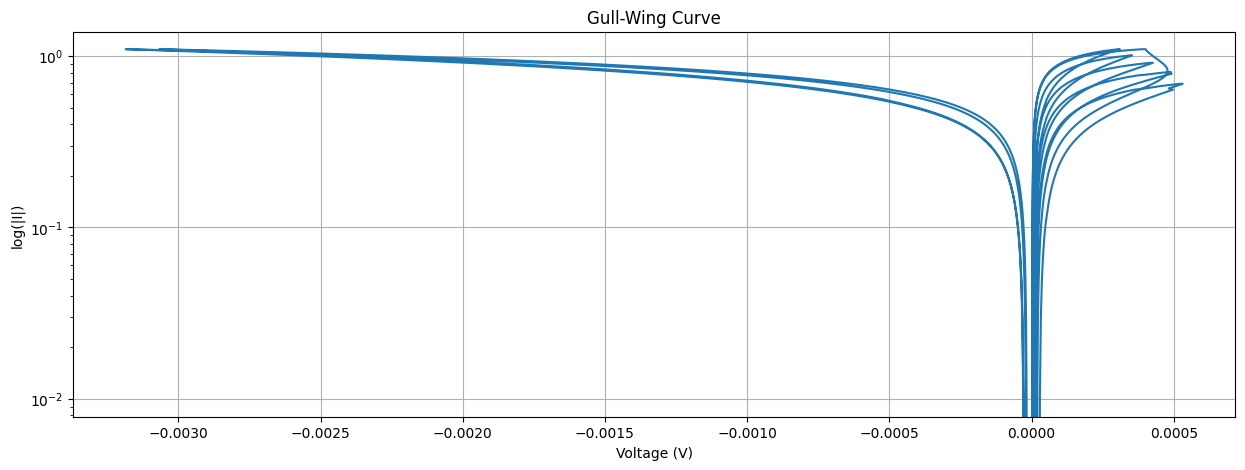

In [35]:
# Gull-Wing Curve: X-axis - current A & Y-axis - log(|V|)
fig1, axs1 = plt.subplots(figsize=(15, 5))
axs1.plot(current, log_abs_voltage)
axs1.set_title('Gull-Wing Curve')
axs1.set_xlabel('Voltage (V)')
axs1.set_ylabel('log(|I|)')
axs1.set_yscale('log')
axs1.grid()

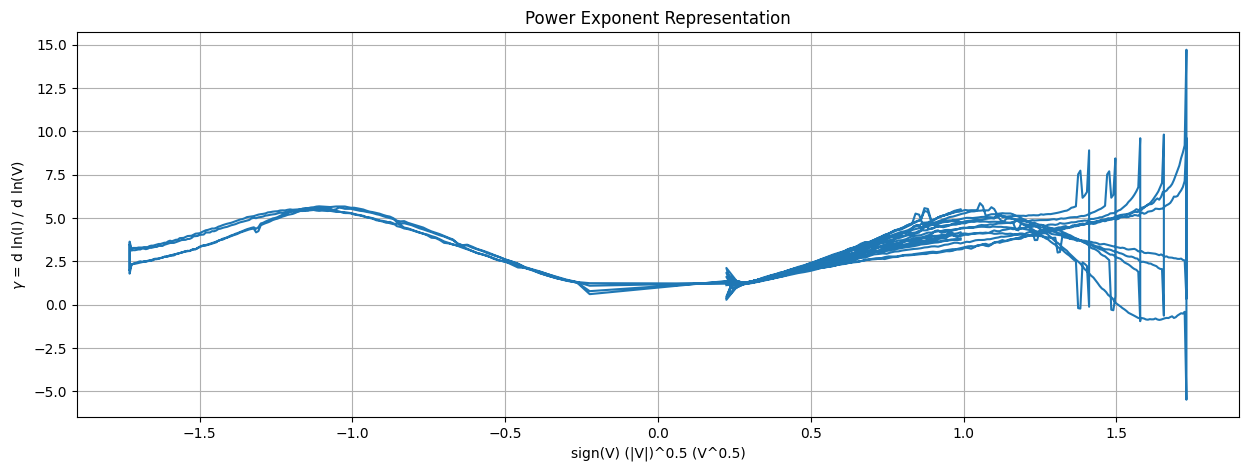

In [36]:
# Power Exponent Representation: X-axis - d ln(I) / d ln(V) & Y-axis - sign(V) (|V|)^0.5 (V^0.5)
fig2, axs2 = plt.subplots(figsize=(15, 5))
axs2.plot(sqrt_voltage, power_exponent)
axs2.set_title('Power Exponent Representation')
axs2.set_xlabel('sign(V) (|V|)^0.5 (V^0.5)')
axs2.set_ylabel(r'$\gamma$ ' + '= d ln(I) / d ln(V)')
axs2.grid()